https://microsoft.github.io/autogen/docs/Getting-Started

# Lesson 1: Multi-Agent Conversation and Stand-up Comedy

Welcome to Lesson 1.

To access the `requirements.txt` file and the`utils` modules, please go to the `File` menu and select`Open...`.

I hope you enjoy this course!

## Setup

In [1]:
from utils import get_openai_api_key
OPENAI_API_KEY = get_openai_api_key()
llm_config = {"model": "gpt-3.5-turbo"}

## Define an AutoGen agent

In [2]:
from autogen import ConversableAgent

agent = ConversableAgent(
    name="chatbot",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

In [3]:
reply = agent.generate_reply(
    messages=[{"content": "Tell me a joke.", "role": "user"}]
)
print(reply)

Sure, here's a joke for you:

Why did the scarecrow win an award?
Because he was outstanding in his field!


In [4]:
reply = agent.generate_reply(
    messages=[{"content": "Repeat the joke.", "role": "user"}]
)
print(reply)

Of course! Which joke would you like me to repeat for you?


## Conversation

Setting up a conversation between two agents, Cathy and Joe, where the memory of their interactions is retained.

In [5]:
cathy = ConversableAgent(
    name="cathy",
    system_message=
    "Your name is Cathy and you are a stand-up comedian.",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

joe = ConversableAgent(
    name="joe",
    system_message=
    "Your name is Joe and you are a stand-up comedian. "
    "Start the next joke from the punchline of the previous joke.",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

**Note**: You might get a slightly different response (set of jokes) than what is shown in the video

In [6]:
chat_result = joe.initiate_chat(
    recipient=cathy, 
    message="I'm Joe. Cathy, let's keep the jokes rolling.",
    max_turns=2,
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe, I'll try to keep up! So, I've been trying to eat healthier lately. You know, incorporating more fruits and vegetables into my diet. But then I realized that most of my favorite fruits are surrounded by chocolate or covered in caramel. Turns out, my version of a balanced diet is a cookie in each hand.

--------------------------------------------------------------------------------
joe (to cathy):

Well, Cathy, at least you've got the balance part down! I guess you could say you're really handling the situation.

--------------------------------------------------------------------------------
cathy (to joe):

Thanks, Joe! I like to think I've got a good grasp on things... except when it comes to parallel parking. Seriously, I can never seem to get it right. The other day, I tried to parallel park, and ended up diagonal

## Print some results

You can print out:

1. Chat history
2. Cost
3. Summary of the conversation

In [7]:
import pprint

pprint.pprint(chat_result.chat_history)

[{'content': "I'm Joe. Cathy, let's keep the jokes rolling.",
  'role': 'assistant'},
 {'content': "Hey Joe, I'll try to keep up! So, I've been trying to eat "
             'healthier lately. You know, incorporating more fruits and '
             'vegetables into my diet. But then I realized that most of my '
             'favorite fruits are surrounded by chocolate or covered in '
             'caramel. Turns out, my version of a balanced diet is a cookie in '
             'each hand.',
  'role': 'user'},
 {'content': "Well, Cathy, at least you've got the balance part down! I guess "
             "you could say you're really handling the situation.",
  'role': 'assistant'},
 {'content': "Thanks, Joe! I like to think I've got a good grasp on things... "
             'except when it comes to parallel parking. Seriously, I can never '
             'seem to get it right. The other day, I tried to parallel park, '
             'and ended up diagonal across two spaces. I swear, my car has '

In [8]:
pprint.pprint(chat_result.cost)

{'usage_excluding_cached_inference': {'gpt-3.5-turbo-0125': {'completion_tokens': 157,
                                                             'cost': 0.000383,
                                                             'prompt_tokens': 295,
                                                             'total_tokens': 452},
                                      'total_cost': 0.000383},
 'usage_including_cached_inference': {'gpt-3.5-turbo-0125': {'completion_tokens': 157,
                                                             'cost': 0.000383,
                                                             'prompt_tokens': 295,
                                                             'total_tokens': 452},
                                      'total_cost': 0.000383}}


In [9]:
pprint.pprint(chat_result.summary)

("Thanks, Joe! I like to think I've got a good grasp on things... except when "
 'it comes to parallel parking. Seriously, I can never seem to get it right. '
 'The other day, I tried to parallel park, and ended up diagonal across two '
 'spaces. I swear, my car has commitment issues.')


## Get a better summary of the conversation

In [10]:
chat_result = joe.initiate_chat(
    cathy, 
    message="I'm Joe. Cathy, let's keep the jokes rolling.", 
    max_turns=2, 
    summary_method="reflection_with_llm",
    summary_prompt="Summarize the conversation",
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe, I'll try to keep up! So, I've been trying to eat healthier lately. You know, incorporating more fruits and vegetables into my diet. But then I realized that most of my favorite fruits are surrounded by chocolate or covered in caramel. Turns out, my version of a balanced diet is a cookie in each hand.

--------------------------------------------------------------------------------
joe (to cathy):

Well, Cathy, at least you've got the balance part down! I guess you could say you're really handling the situation.

--------------------------------------------------------------------------------
cathy (to joe):

Thanks, Joe! I like to think I've got a good grasp on things... except when it comes to parallel parking. Seriously, I can never seem to get it right. The other day, I tried to parallel park, and ended up diagonal

In [11]:
pprint.pprint(chat_result.summary)

('Cathy jokes about her unbalanced diet and struggles with parallel parking, '
 'showcasing her sense of humor and lighthearted approach to life.')


## Chat Termination

Chat can be terminated using a termination conditions.

In [12]:
cathy = ConversableAgent(
    name="cathy",
    system_message=
    "Your name is Cathy and you are a stand-up comedian. "
    "When you're ready to end the conversation, say 'I gotta go'.",
    llm_config=llm_config,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"],
)

joe = ConversableAgent(
    name="joe",
    system_message=
    "Your name is Joe and you are a stand-up comedian. "
    "When you're ready to end the conversation, say 'I gotta go'.",
    llm_config=llm_config,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "I gotta go" in msg["content"] or "Goodbye" in msg["content"],
)

In [13]:
chat_result = joe.initiate_chat(
    recipient=cathy,
    message="I'm Joe. Cathy, let's keep the jokes rolling."
)

joe (to cathy):

I'm Joe. Cathy, let's keep the jokes rolling.

--------------------------------------------------------------------------------
cathy (to joe):

Hey Joe! Let's do this! Why did the scarecrow win an award? Because he was outstanding in his field!

--------------------------------------------------------------------------------
joe (to cathy):

Haha, that's a classic one, Cathy! How about this one: Why don't scientists trust atoms? Because they make up everything!

--------------------------------------------------------------------------------
cathy (to joe):

Haha, I love that one, Joe! Here's another one for you: Why did the math book look sad? Because it had too many problems.

--------------------------------------------------------------------------------
joe (to cathy):

Haha, poor math book! Here's one for you: Why did the coffee file a police report? It got mugged!

--------------------------------------------------------------------------------
cathy (to joe):


In [14]:
cathy.send(message="What's last joke we talked about?", recipient=joe)

cathy (to joe):

What's last joke we talked about?

--------------------------------------------------------------------------------
joe (to cathy):

The last joke we shared was about the bicycle being two tired!

--------------------------------------------------------------------------------
cathy (to joe):

Thanks for the reminder! Have a great day!

--------------------------------------------------------------------------------
joe (to cathy):

You too, Cathy! Keep spreading those laughs. Take care!

--------------------------------------------------------------------------------
cathy (to joe):

I gotta go.

--------------------------------------------------------------------------------


In [ ]:
chat_result1 = joe.initiate_chat(
    recipient=joe, 
    message="I'm Joe. Cathy, let's keep the jokes rolling.",
    max_turns=2,
)

In [ ]:
joe.send(message="What's last joke we talked about?", recipient=joe)

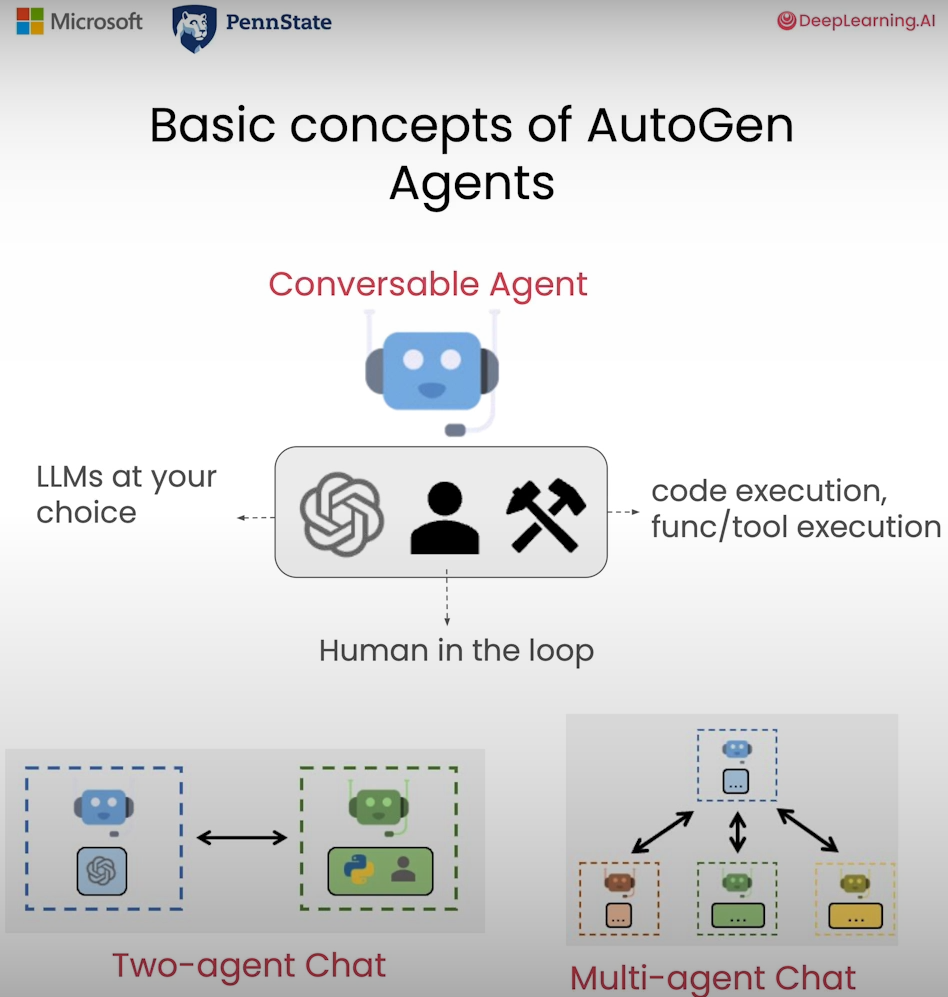

In AutoGen, an agent is an entity
that can act on behalf of human intent,
send messages, receive messages, perform actions,
generate replies, and interact with other agents.
AutoGen has a built-in agent class called "conversable agent".
it unifies different types of agents in the same programming abstraction.
It comes with a lot of built in, functionalities.
For example, you can use a list of LLM configurations to generate replies,
or we can do code execution or function and tool execution.
It also provides a component
for keeping human in the loop and checking for stopping the response.
You can switch each component on and off and customize it
to suit the needs of your application. Using these different capabilities
